In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn import neural_network
import matplotlib.pyplot as plt 
from sklearn import linear_model
import os

In [21]:
import numpy as np
from PIL import Image 
from skimage.io import imread
from skimage.transform import resize
def loadData():

    images = []
    labels = []

    limit = 100

    dir = "data/train/"
    count = 1
    for file in os.listdir(dir):
        img = imread(dir + file)
        img = resize(img, (15, 15))

        images.append(img.flatten())
        labels.append("normal")

        if count >= limit: break
        count += 1

    dir = "data/train_sepia/"
    count = 1
    for file in os.listdir(dir):
        img = imread(dir + file)
        img = resize(img, (15, 15))

        images.append(img.flatten())
        labels.append("sepia")

        if count >= limit: break
        count += 1

    inputs = np.asarray(images)
    outputs = np.asarray(labels)

    noData = len(inputs)
    permutation = np.random.permutation(noData)
    inputs = inputs[permutation]
    outputs = outputs[permutation]

    return inputs, outputs

inputs, outputs = loadData()
outputNames = ["normal", "sepia"]

In [22]:
def splitData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]
    
    return trainInputs, trainOutputs, testInputs, testOutputs

In [23]:
def plotConfusionMatrix(cm, classNames, title):
    from sklearn.metrics import confusion_matrix
    import itertools 

    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                horizontalalignment = 'center',
                color = 'white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

def evalMultiClass(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix

    confMatrix = confusion_matrix(realLabels, computedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix

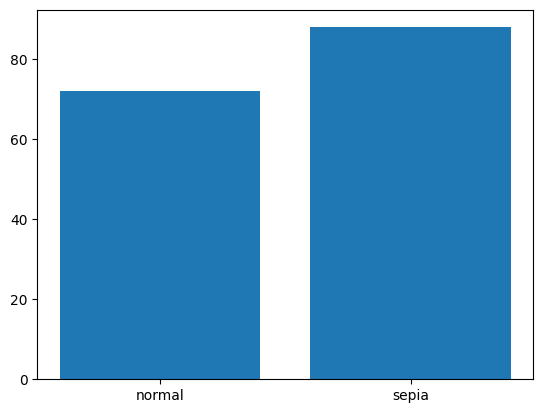

In [24]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
bins = range(3)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), outputNames)
plt.show()

Iteration 1, loss = 0.71242059
Iteration 2, loss = 0.68795703
Iteration 3, loss = 0.66518592
Iteration 4, loss = 0.65259318
Iteration 5, loss = 0.64385561
Iteration 6, loss = 0.63441078
Iteration 7, loss = 0.62436333
Iteration 8, loss = 0.61441669
Iteration 9, loss = 0.60406080
Iteration 10, loss = 0.59328809
Iteration 11, loss = 0.58182696
Iteration 12, loss = 0.56957414
Iteration 13, loss = 0.55661517
Iteration 14, loss = 0.54397233
Iteration 15, loss = 0.53126650
Iteration 16, loss = 0.51805719
Iteration 17, loss = 0.50434081
Iteration 18, loss = 0.49038490
Iteration 19, loss = 0.47595504
Iteration 20, loss = 0.46114651
Iteration 21, loss = 0.44598456
Iteration 22, loss = 0.43060505
Iteration 23, loss = 0.41509462
Iteration 24, loss = 0.39955006
Iteration 25, loss = 0.38397404
Iteration 26, loss = 0.36841855
Iteration 27, loss = 0.35302627
Iteration 28, loss = 0.33792650
Iteration 29, loss = 0.32319007
Iteration 30, loss = 0.30892929
Iteration 31, loss = 0.29519668
Iteration 32, los

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


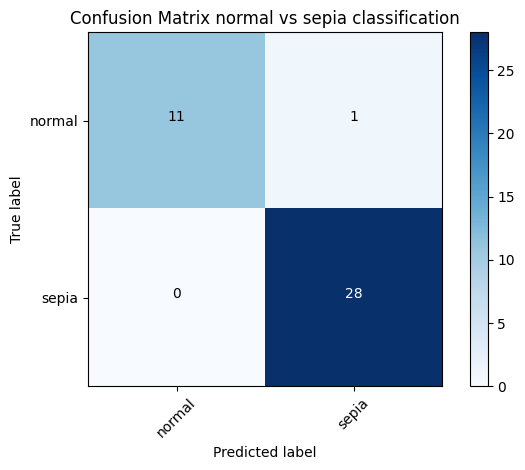

acc:  0.975
precision:  {'normal': 1.0, 'sepia': 0.9655172413793104}
recall:  {'normal': 0.9166666666666666, 'sepia': 1.0}


In [25]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(10, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.01)
classifier.classes_ = outputNames
classifier.fit(trainInputs, trainOutputs)

predictedLabels = classifier.predict(testInputs)
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)

plotConfusionMatrix(cm, outputNames, "normal vs sepia classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)